## 1. Логістична карта

Модель:  
$$
x_{n+1} = 4 r \, x_n (1 - x_n), \quad x_0 \in (0,1), \; r \in (0,1].
$$

План візуалізацій:
1) Траєкторії $x_n$ для різних $r$ (перехід від фіксованої точки до періодів і хаосу).  
2) Діаграма біфуркацій $x_n$ vs $r$ (після відкидання транзієнта).  
3) Демонстрація чутливості до початкових умов при хаотичних $r$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def logistic_map_iter(r, x0, n_steps, drop=0):
    """Ітерації логістичної карти.
    r: параметр у (0,1], x0: старт, n_steps: к-ть кроків
    drop: скільки пропустити початкових значень
    """
    x = np.empty(n_steps + 1, dtype=float)
    x[0] = x0
    for n in range(n_steps):
        x[n+1] = 4.0 * r * x[n] * (1.0 - x[n])
    return x[drop:] if drop > 0 else x

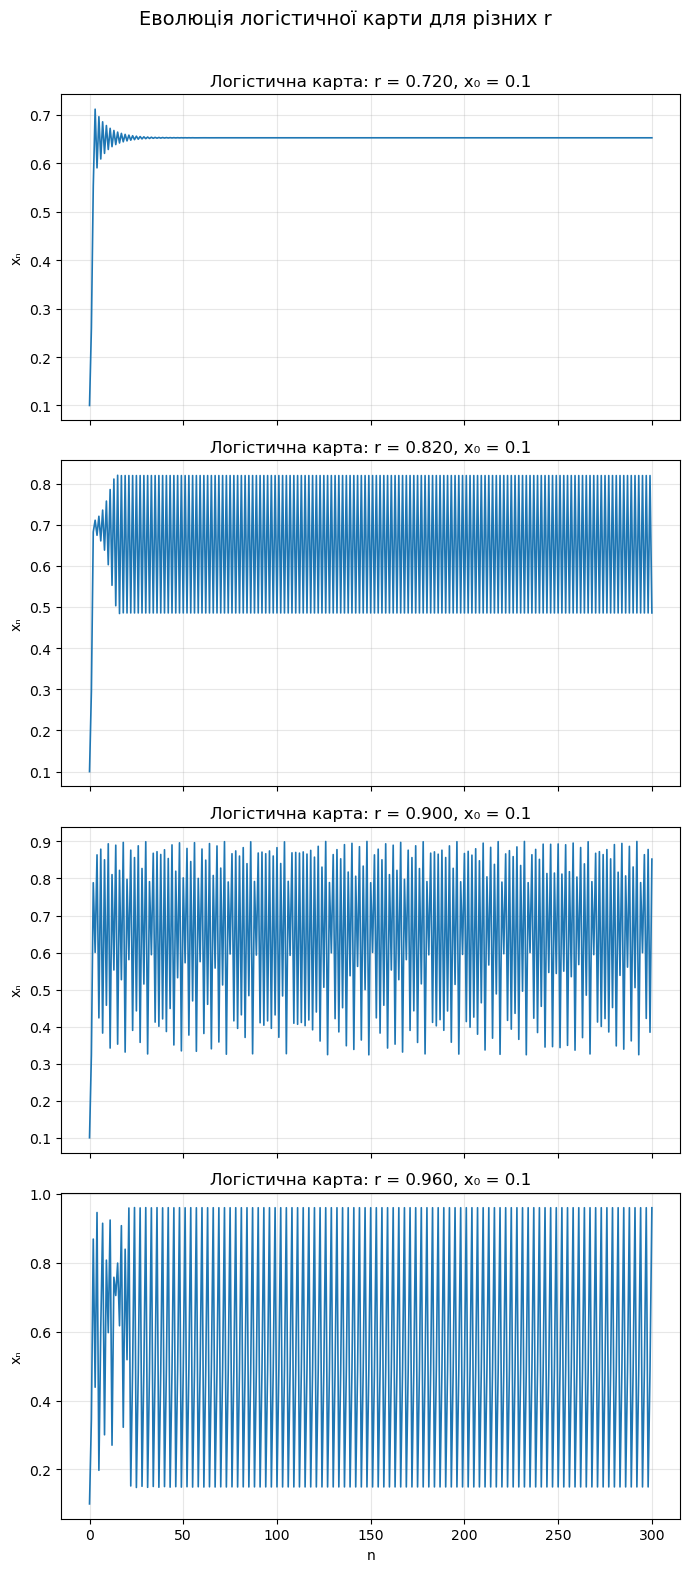

In [3]:
def plot_logistic_map(r_values=(0.7, 0.8, 0.9, 1.0), x0=0.1, n_steps=200):
    n = len(r_values)
    fig, axes = plt.subplots(n, 1, figsize=(7, 4*n), sharex=True)

    for ax, r in zip(axes, r_values):
        x = logistic_map_iter(r, x0, n_steps)
        ax.plot(x, linewidth=1.2, color='tab:blue')
        ax.set_title(f"Логістична карта: r = {r:.3f}, x₀ = {x0}")
        ax.set_ylabel("xₙ")
        ax.grid(True, alpha=0.3)
    axes[-1].set_xlabel("n")

    fig.suptitle("Еволюція логістичної карти для різних r", fontsize=14)
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


plot_logistic_map(r_values=[0.72, 0.82, 0.9, 0.96], x0=0.1, n_steps=300)

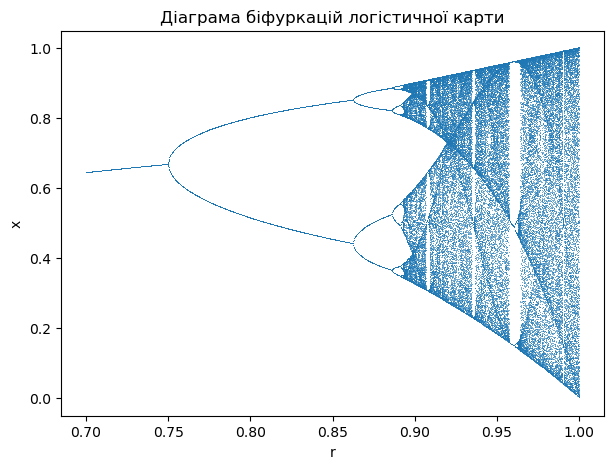

In [11]:
def plot_bifurcation(r_min=0.7, r_max=1.0, r_points=1000, n_transient=1000, n_plot=200):
    rs = np.linspace(r_min, r_max, r_points)
    xs_all = []
    rs_all = []
    x0 = 0.5
    for r in rs:
        x = logistic_map_iter(r, x0, n_transient + n_plot, drop=n_transient)
        xs_all.append(x)
        rs_all.append(np.full_like(x, r))
    xs_all = np.concatenate(xs_all)
    rs_all = np.concatenate(rs_all)
    plt.figure(figsize=(7, 5))
    plt.plot(rs_all, xs_all, ',', alpha=0.6)
    plt.title("Діаграма біфуркацій логістичної карти")
    plt.xlabel("r")
    plt.ylabel("x")
    plt.show()

plot_bifurcation()

## 2. Модель Лоренца

Система:  
$
\begin{cases}
\dot x = \sigma (y - x)\\
 \dot y = r x - y - x z\\
  \dot z = x y - b z.
\end{cases}
$

Стандартні параметри: $\sigma=10,\; b=\tfrac{8}{3},\; r=28$.  
Дивимось часові ряди, проєкції фазових портретів, і розбігання близьких траєкторій.

In [8]:
def rk4_fixed(rhs, t0, T, s0, dt, args=()):
    """Метод Рунге–Кутти 4-го порядку з фіксованим кроком."""
    s0 = np.asarray(s0, dtype=float)
    t = np.arange(t0, T + dt/2, dt)
    S = np.empty((len(t), len(s0)))
    S[0] = s = s0

    for i, ti in enumerate(t[:-1]):
        k1 = rhs(ti, s, *args)
        k2 = rhs(ti + dt/2, s + dt/2 * k1, *args)
        k3 = rhs(ti + dt/2, s + dt/2 * k2, *args)
        k4 = rhs(ti + dt,   s + dt * k3,   *args)
        s += (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
        S[i + 1] = s

    return t, S

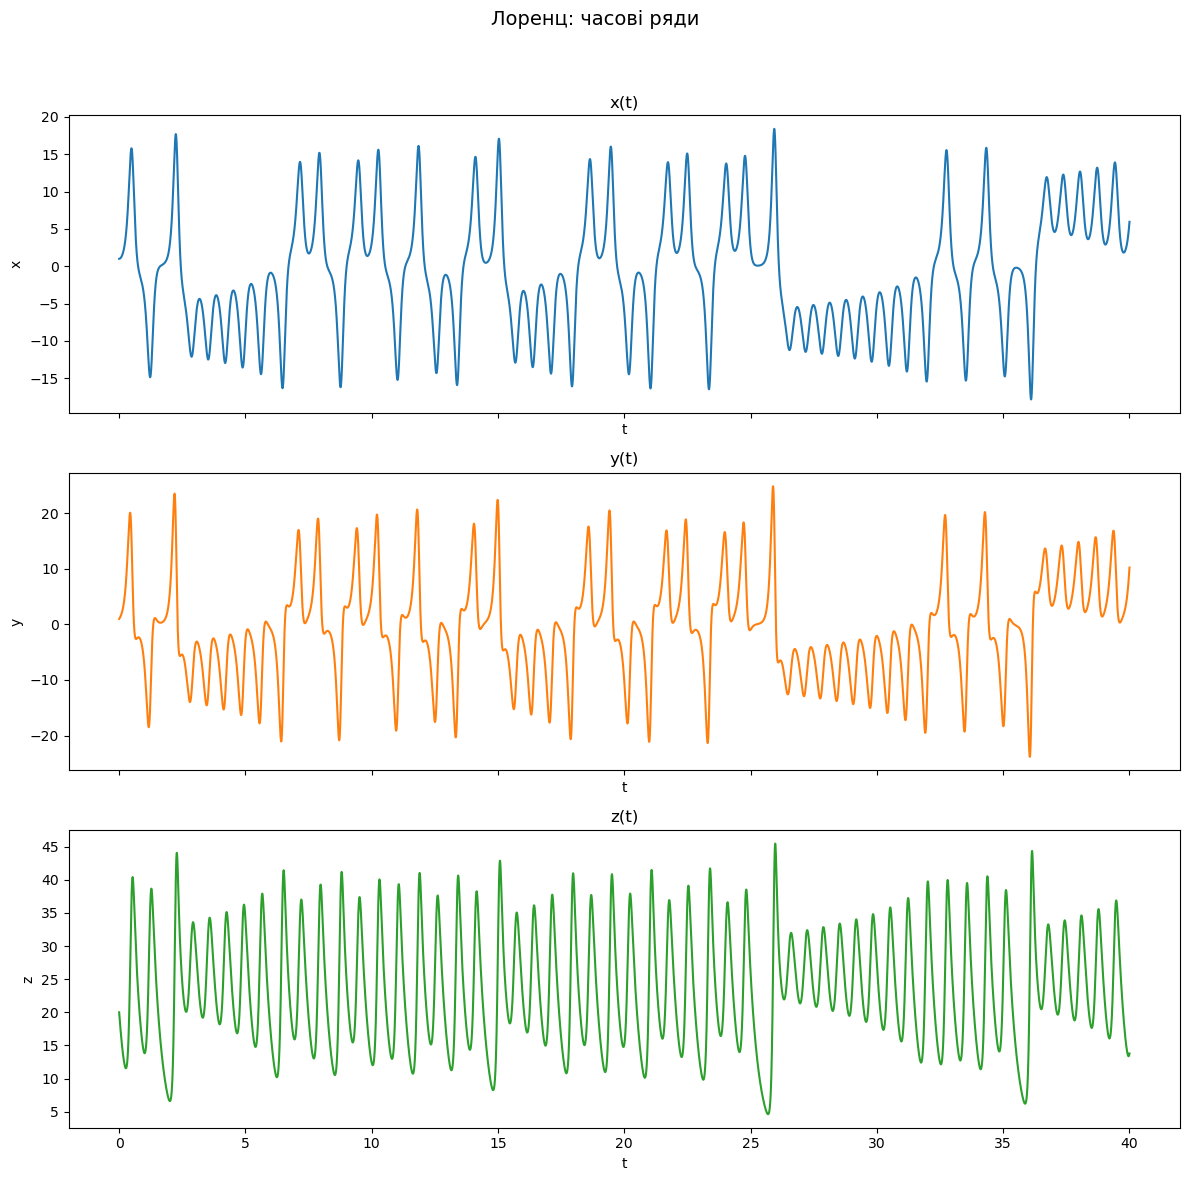

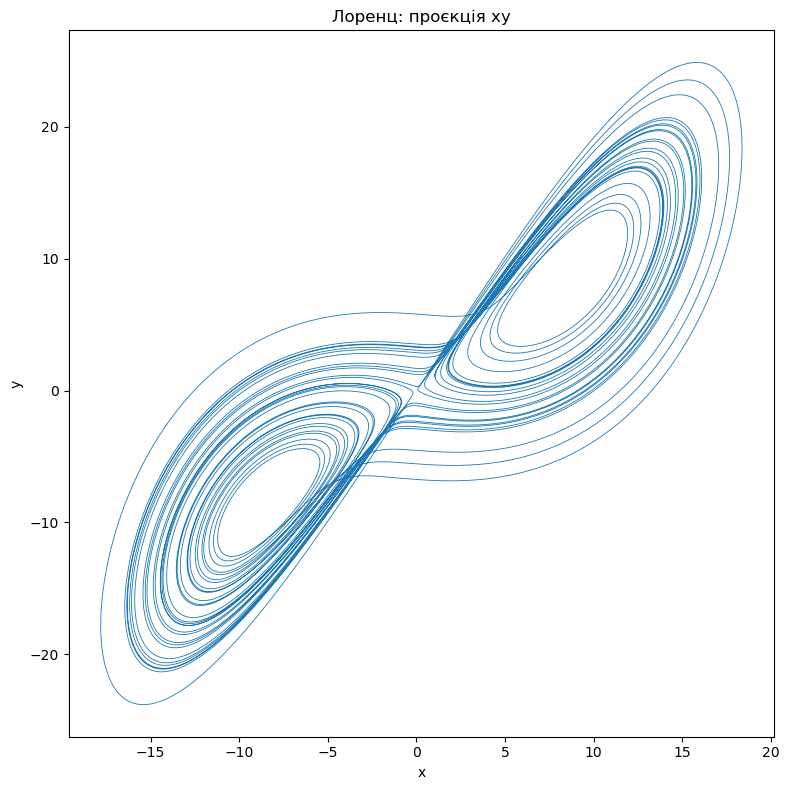

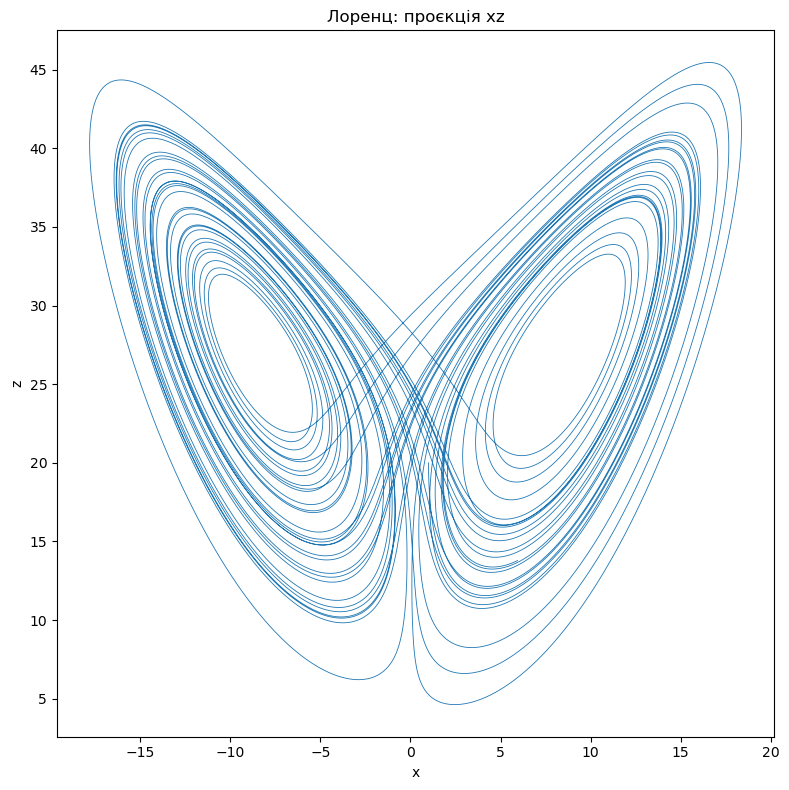

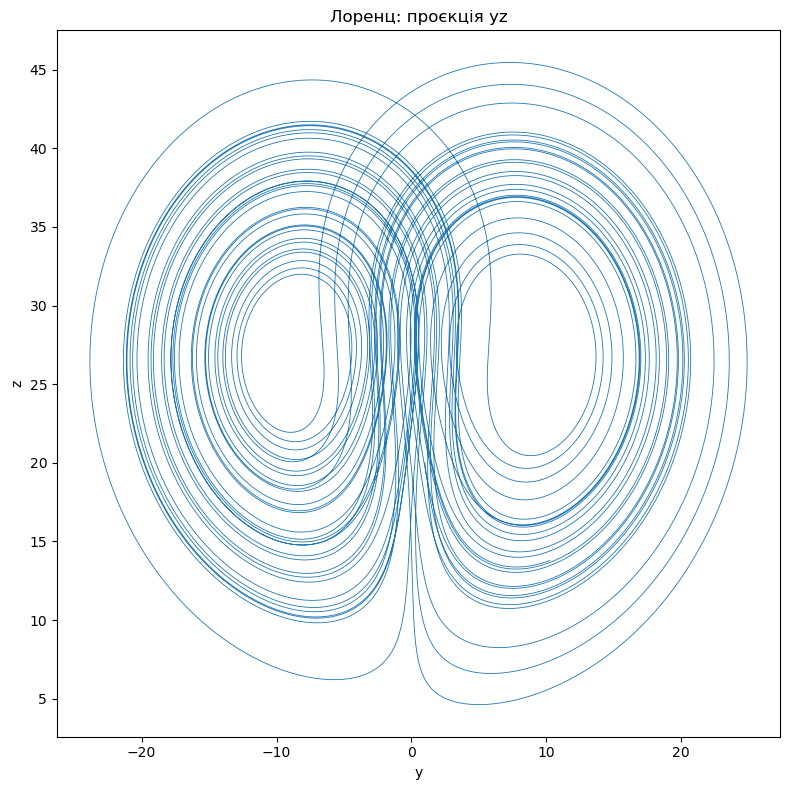

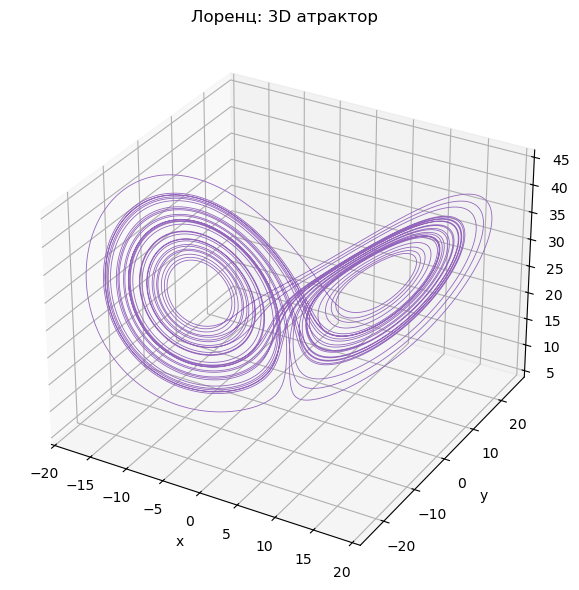

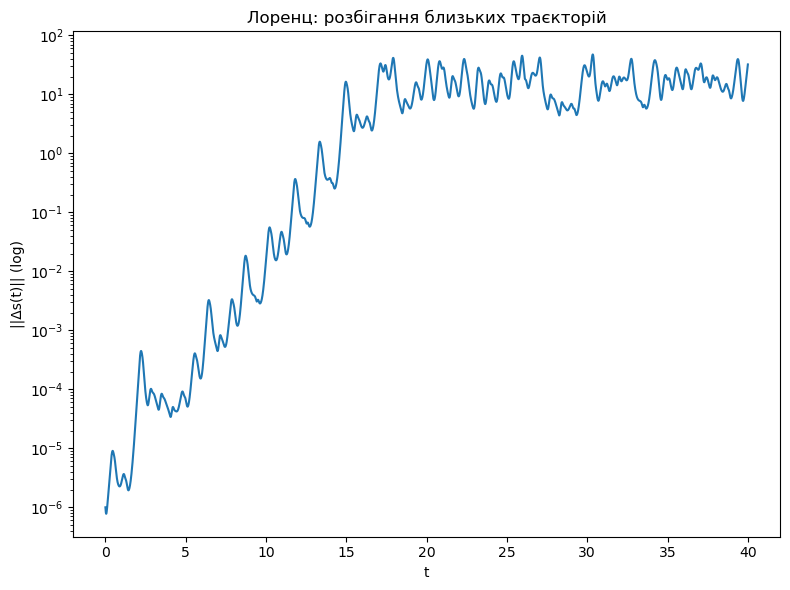

In [9]:
def lorenz_rhs(t, s, sigma=10.0, r=28.0, b=8.0/3.0):
    x, y, z = s
    return np.array([sigma*(y - x), r*x - y - x*z, x*y - b*z])

def simulate_lorenz(T=40.0, dt=0.001, s0=(1.0, 1.0, 20.0),
                    pars=(10.0, 28.0, 8.0/3.0)):
    sigma, r, b = pars
    t, S = rk4_fixed(lorenz_rhs, 0.0, T, s0, dt, args=(sigma, r, b))
    return t, S

def plot_lorenz():
    t, S = simulate_lorenz()
    x, y, z = S[:,0], S[:,1], S[:,2]

    # часові ряди
    fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
    axes[0].plot(t, x, color='tab:blue')
    axes[0].set_title("x(t)")
    axes[0].set_xlabel("t")
    axes[0].set_ylabel("x")

    axes[1].plot(t, y, color='tab:orange')
    axes[1].set_title("y(t)")
    axes[1].set_xlabel("t")
    axes[1].set_ylabel("y")

    axes[2].plot(t, z, color='tab:green')
    axes[2].set_title("z(t)")
    axes[2].set_xlabel("t")
    axes[2].set_ylabel("z")

    fig.suptitle("Лоренц: часові ряди", fontsize=14)
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # проєкції фазових портретів
    for (a,b,an,bn,title) in [(x,y,'x','y','xy'), (x,z,'x','z','xz'), (y,z,'y','z','yz')]:
        plt.figure(figsize=(8, 8))
        plt.plot(a, b, linewidth=0.6)
        plt.xlabel(an)
        plt.ylabel(bn)
        plt.title(f"Лоренц: проєкція {title}")
        plt.tight_layout()
        plt.show()

    fig = plt.figure(figsize=(7, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z, lw=0.6, color='tab:purple')

    ax.set_title("Лоренц: 3D атрактор")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.tight_layout()
    plt.show()

    # чутливість до поч. умов
    t1, S1 = simulate_lorenz(s0=(1.0, 1.0, 20.0))
    t2, S2 = simulate_lorenz(s0=(1.0 + 1e-6, 1.0, 20.0))
    d = np.linalg.norm(S1 - S2, axis=1)
    plt.figure(figsize=(8, 6))
    plt.semilogy(t1, d)
    plt.title("Лоренц: розбігання близьких траєкторій")
    plt.xlabel("t")
    plt.ylabel("||Δs(t)|| (log)")
    plt.tight_layout()
    plt.show()

plot_lorenz()

## 3. Система Росслера

Система:  
$\begin{cases}
\dot x = -y - z\\
\dot y = x + \varepsilon y\\
\dot z = f - \mu z + x z.
\end{cases}
$

Рекомендовані параметри: $\varepsilon = 0.3,\; f = 0.4,\; \mu = 8.5$.  
Виводимо часові ряди та проєкції фазових портретів.

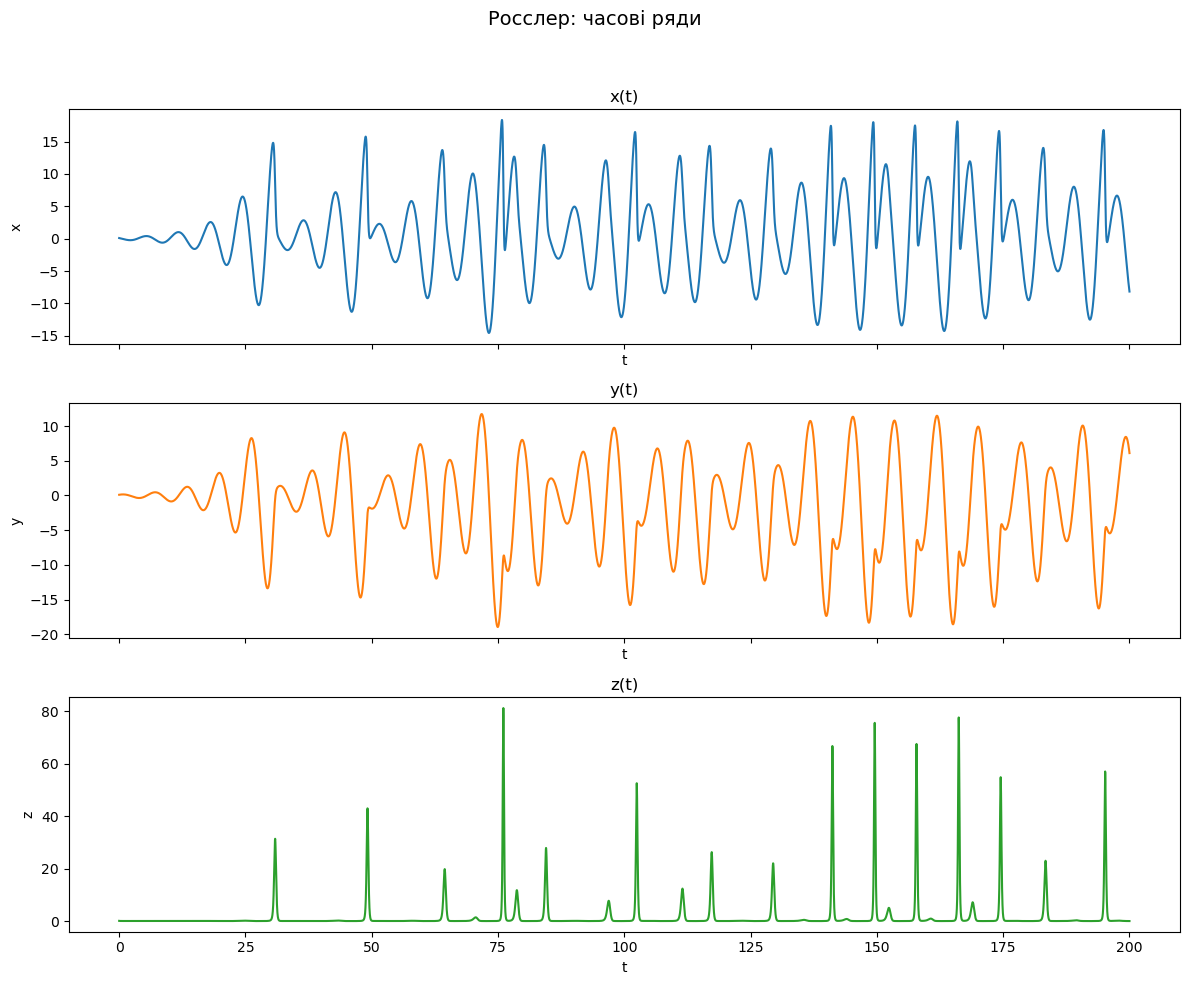

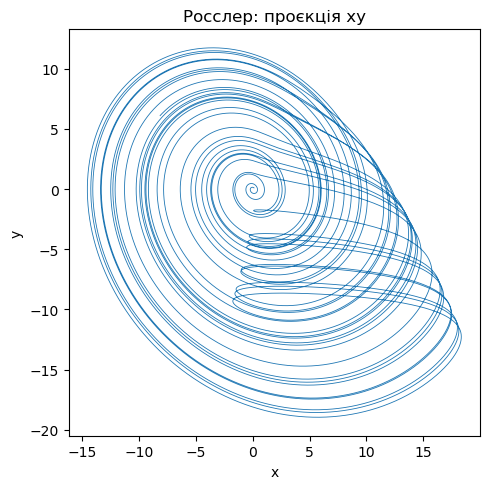

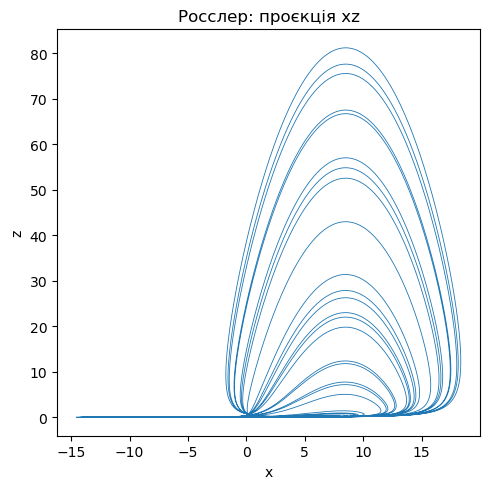

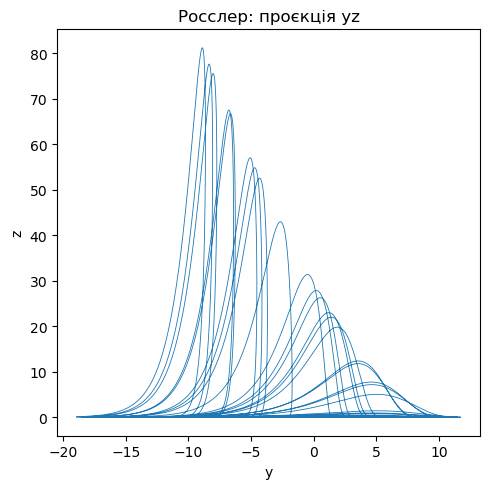

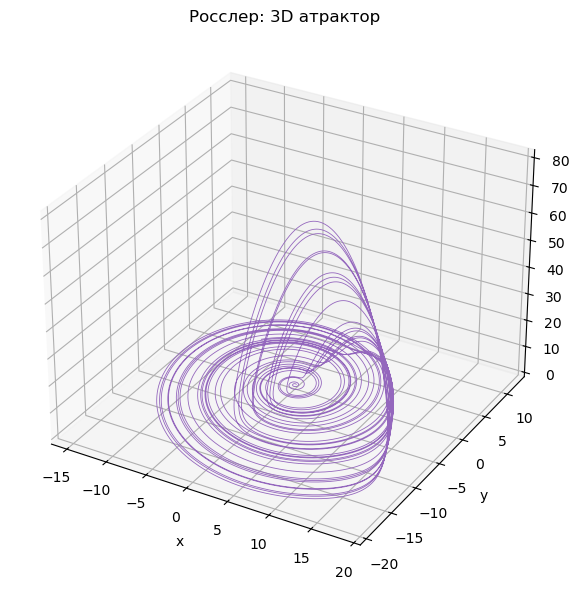

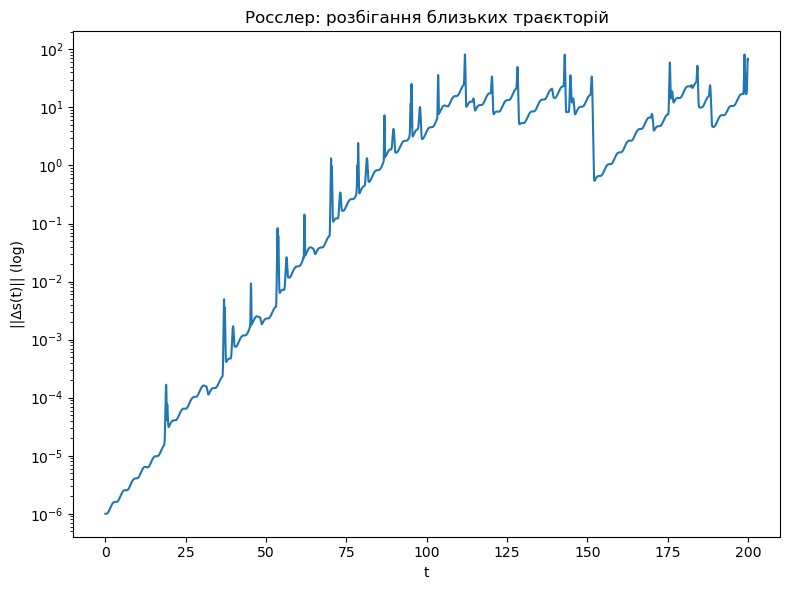

In [10]:
from mpl_toolkits.mplot3d import Axes3D 

def rossler_rhs(t, s, eps=0.3, f=0.4, mu=8.5):
    x, y, z = s
    return np.array([-y - z, x + eps * y, f - mu * z + x * z])

def simulate_rossler(T=200.0, dt=0.001, s0=(0.1, 0.1, 0.1), pars=(0.3, 0.4, 8.5)):
    eps, f, mu = pars
    t, S = rk4_fixed(rossler_rhs, 0.0, T, s0, dt, args=(eps, f, mu))
    return t, S

def plot_rossler():
    t, S = simulate_rossler()
    x, y, z = S[:,0], S[:,1], S[:,2]

    # часові ряди
    fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

    axes[0].plot(t, x, color='tab:blue')
    axes[0].set_title("x(t)")
    axes[0].set_xlabel("t")
    axes[0].set_ylabel("x")

    axes[1].plot(t, y, color='tab:orange')
    axes[1].set_title("y(t)")
    axes[1].set_xlabel("t")
    axes[1].set_ylabel("y")

    axes[2].plot(t, z, color='tab:green')
    axes[2].set_title("z(t)")
    axes[2].set_xlabel("t")
    axes[2].set_ylabel("z")

    fig.suptitle("Росслер: часові ряди", fontsize=14)
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # проєкції
    for (a,b,an,bn,title) in [(x,y,'x','y','xy'), (x,z,'x','z','xz'), (y,z,'y','z','yz')]:
        plt.figure(figsize=(5, 5))
        plt.plot(a, b, linewidth=0.6)
        plt.xlabel(an)
        plt.ylabel(bn)
        plt.title(f"Росслер: проєкція {title}")
        plt.tight_layout()
        plt.show()

    fig = plt.figure(figsize=(7, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z, lw=0.6, color='tab:purple')

    ax.set_title("Росслер: 3D атрактор")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.tight_layout()
    plt.show()

    # чутливість до поч. умов
    t1, S1 = simulate_rossler(s0=(1.0, 0.1, 0.1))
    t2, S2 = simulate_rossler(s0=(1.0 + 1e-6, 0.1, 0.1))
    d = np.linalg.norm(S1 - S2, axis=1)
    plt.figure(figsize=(8, 6))
    plt.semilogy(t1, d)
    plt.title("Росслер: розбігання близьких траєкторій")
    plt.xlabel("t")
    plt.ylabel("||Δs(t)|| (log)")
    plt.tight_layout()
    plt.show()

plot_rossler()